# MID TEST -- PYHTON USE CASE 2
***
# <center> Tunggal Manda Ary Triyono
# ---------------------------------------------------------------------------------------------------------------

**Dataset** : Apartment Price in Victoria. 

You can download it here. [Victoria.csv](https://drive.google.com/open?id=1j8TdXtCnEQlqn2esDbiuPay01pDooS-w)

**Background** : The Dataset provides living area and conservation status.
There are 218 observations and 16 variables.

**Objective** : Create a python script for the Use Case below, please upload the script after you finish.
The Problem is to determine the best model and give the reason.

Tony who has profession as a broker wants to predict apartment price in Victoria based on living area environment and apartment conservation status. Determine the best model to predict and redefine new conservation variable in 3 level, A = 1A, B = 2A, C = 2B and 3A.

# I. Import Dataset: Load the dataset.

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [140]:
df = pd.read_csv('victoria.csv', sep=';')
df = df.drop('row.labels', axis=1)

***
kolom `row.labels` di hapus karena nilainya adalah nilai urutan row sehingga **tidak digunakan**
***

# II. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean, median, modus, max, min, range)

In [141]:
df.describe()

,totalprice,age,floor,rooms,toilets,garage,elevator,tras
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,280741.523853,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,69298.459358,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,155000.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,228500.000000,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,269750.000000,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,328625.000000,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,560000.000000,118.000000,12.000000,7.000000,2.000000,2.000000,1.000000,2.000000


# Redefine new conservation variable

In [156]:
df['conservation'][df['conservation'] == '1A'] = 'A'
df['conservation'][df['conservation'] == '2A'] = 'B'
df['conservation'][df['conservation'] == '2B'] = 'C'
df['conservation'][df['conservation'] == '3A'] = 'C'

 # III. Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem.

### Heatmap for Corelation

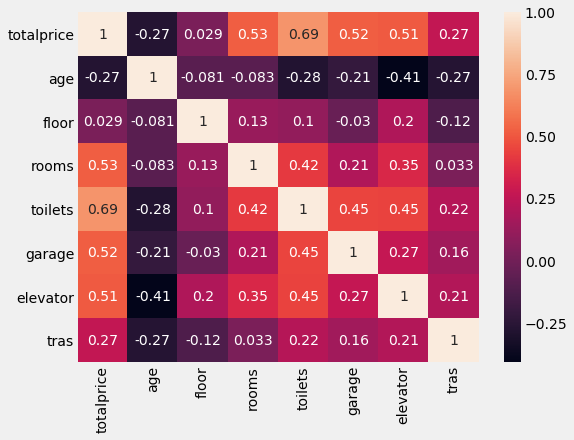

In [142]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True)

***
Grafik diatas menunjukkan hubungan antara beberapa variabel. yang dilihat disini adalah **hubungan** antara **variabel variabel** dengan `totalprice`
***

### Age Distribution

Text(0.5,1,'DISTPLOT AGE')

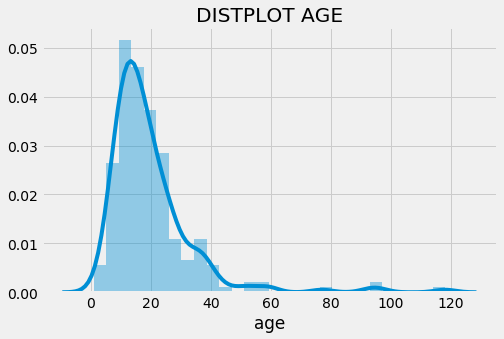

In [143]:
f=plt.figure(figsize=(16,10))
f.add_subplot(2,2,1)
#distplot
sns.distplot(df['age']).set_title('DISTPLOT AGE')
#f.add_subplot(2,2,2)
#barplot
#sns.barplot(x="zone", y="totalprice", data=df).set_title('BARPLOT zone VS price')

***
**Sebagian besar bangunan** yang ada berumur sekitar **20an tahun**
***

Text(0.5,1,'SCATTERPLOT Age VS price')

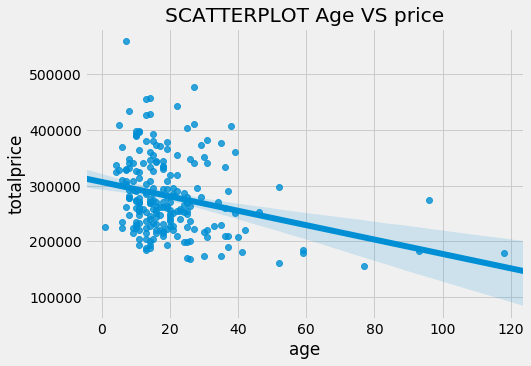

In [144]:
f=plt.figure(figsize=(7,5))
#f.add_subplot(3,3,1)
sns.regplot(df['age'],df['totalprice'],fit_reg=True).set_title('SCATTERPLOT Age VS price')

***
Pada dataset yang digunakan sebagian besar rumah berumur sekitar 20an tahun. pada garis regresi terlihat bahwa **semakin tua usia rumah** tersebut maka **harganya semakin murah**
***

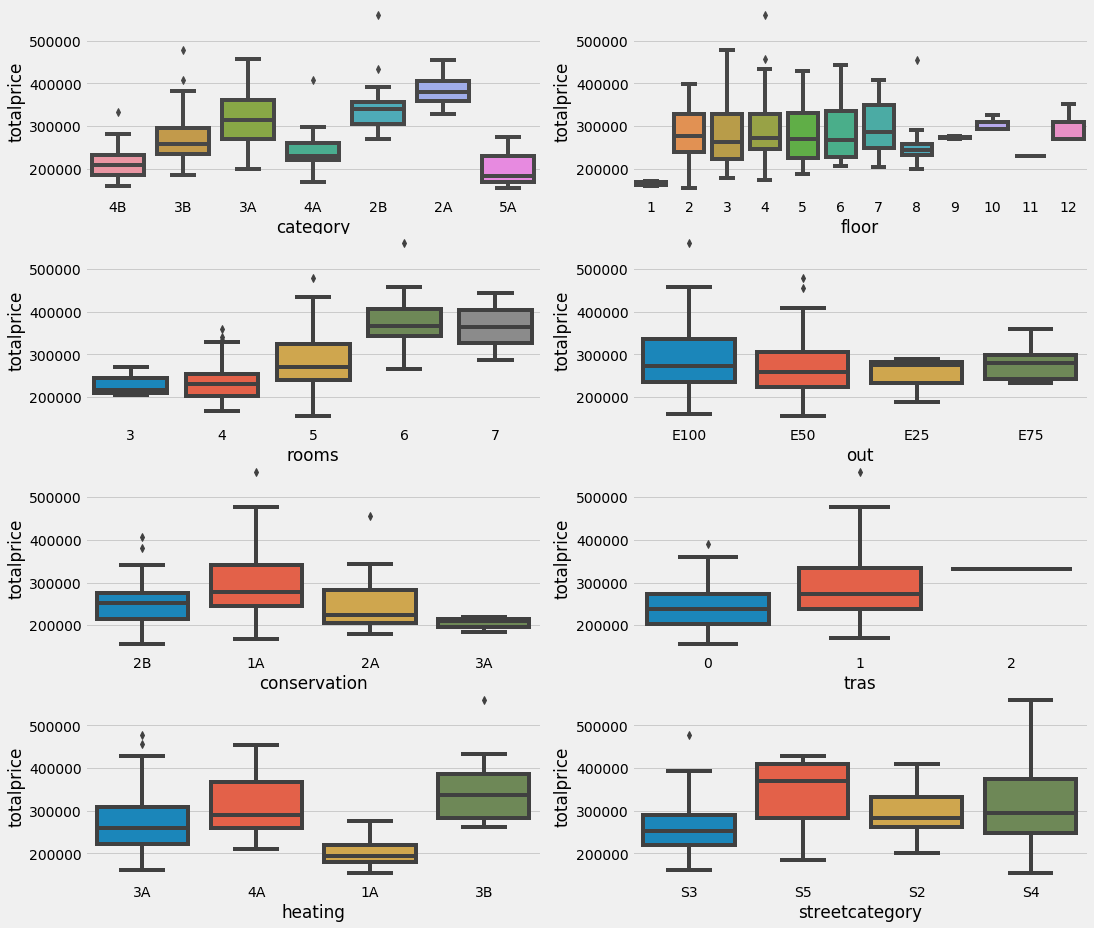

In [145]:
#boxplot
f=plt.figure(figsize=(16,15))
f.add_subplot(4,2,1)
sns.boxplot(y=df["totalprice"], x=df['category'])
f.add_subplot(4,2,2)
sns.boxplot(y=df["totalprice"], x=df['floor'])
f.add_subplot(4,2,3)
sns.boxplot(y=df["totalprice"], x=df['rooms'])
f.add_subplot(4,2,4)
sns.boxplot(y=df["totalprice"], x=df['out'])
f.add_subplot(4,2,5)
sns.boxplot(y=df["totalprice"], x=df['conservation'])
f.add_subplot(4,2,6)
sns.boxplot(y=df["totalprice"], x=df['tras'])
f.add_subplot(4,2,7)
sns.boxplot(y=df["totalprice"], x=df['heating'])
f.add_subplot(4,2,8)
sns.boxplot(y=df["totalprice"], x=df['streetcategory'])

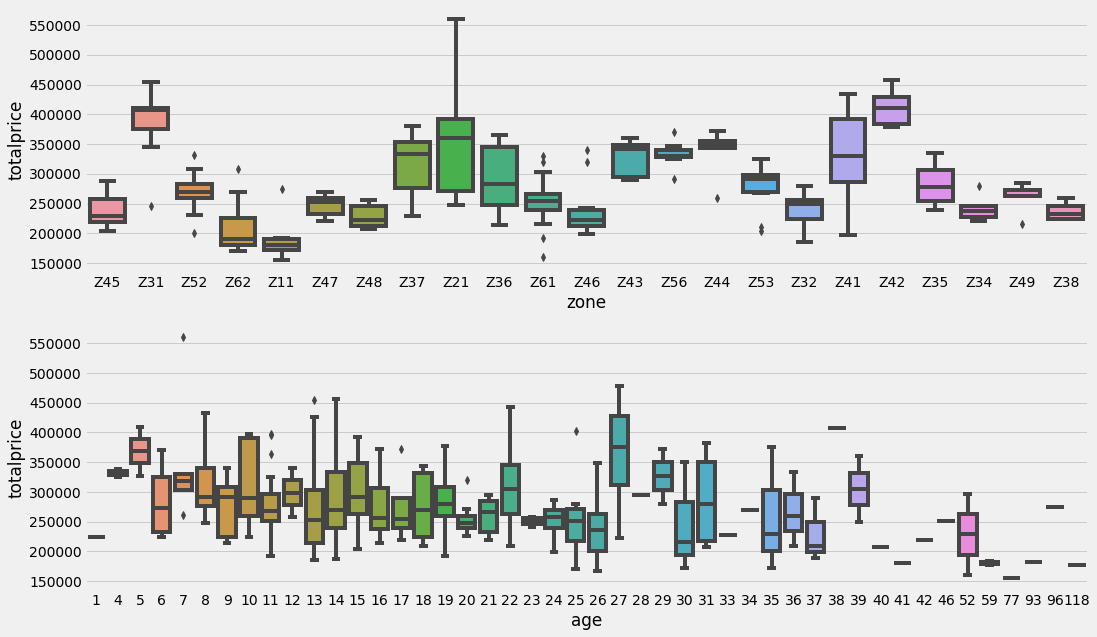

In [146]:
f=plt.figure(figsize=(16,10))
f.add_subplot(2,1,1)
sns.boxplot(y=df["totalprice"], x=df['zone'])
f.add_subplot(2,1,2)
sns.boxplot(y=df["totalprice"], x=df['age'])

***
Grafik-grafik boxplot diatas menunjukkan perbandingan **tiap kategori** rumah dengan **harganya**. misalnya kita dapat melihat bahwa rumah dengan jumlah ruangan 7 lebih mahal harganya daripada rumah dengan jumlah ruangan 3
***

# IV. Variable Selection: Choose the variable and its reason.

In [147]:
y = df['totalprice']
X = df.drop(['totalprice','area','streetcategory'], axis=1)
X = pd.get_dummies(X)

***
Label yang digunakan adalah total price
<br> Sedangkan x yang di gunakan adalah semua fitur selain totalprice, area, zone
***

# V. Modelling: Create models using Regression

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# VI. Accuracy or Error: Calculate the Error using the helper function from the library, from dataset only

In [149]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
y_pred = model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
cv = rmse/df['totalprice'].mean()
print('Root Mean Squared Error : ',rmse)
print('R2 Score : ', r2)
print('Coef Variance : ', cv)

Root Mean Squared Error :  30961.164107550827
R2 Score :  0.8371994407965624
Coef Variance :  0.1102835223040936


# Comparison of several models

In [200]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

mymodel = [LinearRegression, Ridge, RandomForestRegressor, KNeighborsRegressor]
mymodel2 = ['LinearRegression','Ridge', 'RandomForestRegressor', 'KNeighborsRegressor']
lrmse = []
lr2 = []
lcv =[]

for i in mymodel:   
    model = i()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)    
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    cv = rmse/df['totalprice'].mean()
    lrmse.append(rmse)
    lr2.append(r2)
    lcv.append(cv)

allmodel = pd.DataFrame([mymodel2, lrmse, lr2, lcv],index=['Model','RMSE','R2 Score','Coef Variance'])
allmodel = allmodel.transpose()
allmodel

,Model,RMSE,R2 Score,Coef Variance
0,LinearRegression,30961.2,0.837199,0.110284
1,Ridge,31643.6,0.829943,0.112714
2,RandomForestRegressor,42919,0.687161,0.152877
3,KNeighborsRegressor,72018.5,0.119135,0.25653


***
Berdasarkan tabel diatas, model yang paling bagus adalah Linear Regression
***

# Kesimpulan :
Jika kita menggunakan fitur fitur yang ada pada variabel x, maka hasil **r2 score** dari model linear regression ini menunjukkan hasil **0,8**. hasil tersebut sudah **cukup baik** karena model akan semakin baik jika r2 score nya mendekati 1.